In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (10, 10))

In [3]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [4]:
path = "dadosAgrupados.csv"
dadosEnem = pd.read_csv(path,sep=';',encoding='latin1')

In [5]:
dadosEnem.query('NU_NOTA_REDACAO < 60')['NU_NOTA_REDACAO']

25602     40.0
25680     40.0
31399     40.0
137147    40.0
225784    40.0
241950    40.0
351819    40.0
360740    40.0
365987    40.0
391204    40.0
394587    40.0
410168    40.0
459020    40.0
480878    40.0
504424    40.0
517874    40.0
576017    40.0
579502    40.0
579934    40.0
581117    40.0
687318    40.0
710898    40.0
830661    40.0
879967    40.0
882484    40.0
Name: NU_NOTA_REDACAO, dtype: float64

In [6]:
order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior']

In [7]:
def my_boxplot(Grupo,var1,var2,G):
    fig, ax = plt.subplots(figsize=(8, 8))
    df = Grupo
    #escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
    G = sns.boxplot(x=var1, y=var2, data=df, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
    G.set_xticklabels(G.get_xticklabels(),rotation=-30)
    G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
    G.set_xlabel(" ")
    G.set_ylabel(" ")


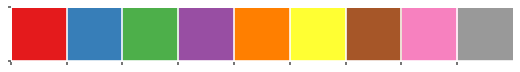

In [8]:
sns.palplot(sns.color_palette("Set1"))
sns.set_palette(sns.color_palette("Set1"))


In [12]:
dadosEnem.RendaMaxima.describe()

count    920588.000000
mean       2999.173276
std        3624.152914
min           0.000000
25%         998.000000
50%        1497.000000
75%        2994.000000
max       19960.000000
Name: RendaMaxima, dtype: float64

In [14]:
dadosEnem.RendaMaxima.value_counts()

998      231721
1497     223484
2495      92246
1996      77677
3992      63696
2994      40095
0         38603
4990      35434
5988      30528
19960     21297
6986      15216
7984      12004
11976     11975
14970      9691
8982       8546
9980       8375
Name: RendaMaxima, dtype: int64

In [30]:
dadosEnem.TP_DEPENDENCIA_ADM_ESC.value_counts(normalize=True)

Estadual      0.772884
Particular    0.168465
Federal       0.050356
Municipal     0.008295
Name: TP_DEPENDENCIA_ADM_ESC, dtype: float64

In [25]:
dadosEnem.query("Cluster == 0")

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA,Cluster
1,F,Parda,15042626.0,Belém,PA,Estadual,Urbano,369.7,398.2,395.6,...,998,E,4,4,NaoBranco,4.00,"(3, 4]",423.46,"(0.0, 438.65]",0
2,F,Parda,15045560.0,Castanhal,PA,Estadual,Urbano,376.4,354.7,525.8,...,1497,E,4,9,NaoBranco,1.50,"(1, 2]",461.26,"(438.65, 576.04]",0
3,F,Parda,15038378.0,Belém,PA,Estadual,Urbano,423.0,372.8,488.7,...,1497,E,12,12,NaoBranco,3.00,"(2, 3]",468.20,"(438.65, 576.04]",0
4,F,Parda,15582949.0,Paragominas,PA,Estadual,Urbano,412.5,417.2,485.1,...,1497,E,12,12,NaoBranco,1.50,"(1, 2]",468.20,"(438.65, 576.04]",0
7,M,Parda,15034747.0,Ananindeua,PA,Estadual,Urbano,422.1,534.4,516.3,...,998,E,0,12,NaoBranco,4.00,"(3, 4]",507.60,"(438.65, 576.04]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920575,F,Parda,31146099.0,Araçuaí,MG,Estadual,Urbano,379.8,468.2,504.1,...,998,E,9,16,NaoBranco,1.50,"(1, 2]",421.72,"(0.0, 438.65]",0
920577,F,Branco,31081817.0,Montes Claros,MG,Estadual,Urbano,440.3,467.1,544.0,...,998,E,5,5,Branco,1.00,"(0, 1]",506.70,"(438.65, 576.04]",0
920578,M,Preta,31233374.0,Janaúba,MG,Estadual,Urbano,375.7,468.3,457.8,...,998,E,4,16,NaoBranco,2.00,"(1, 2]",445.78,"(438.65, 576.04]",0
920579,F,Branco,31108855.0,Paracatu,MG,Estadual,Urbano,423.8,472.0,543.8,...,998,E,0,9,Branco,1.33,"(1, 2]",518.44,"(438.65, 576.04]",0


In [28]:
dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual' and Cluster == 0").shape[0]/dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'").shape[0]

0.6469034782462039

In [18]:
dadosEnem.ClasseSocial.value_counts(normalize=True)

E    0.620783
D    0.212948
C    0.119601
B    0.033056
A    0.013613
Name: ClasseSocial, dtype: float64

In [16]:
dadosEnem

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA,Cluster
0,F,Branco,15230023.0,Paragominas,PA,Particular,Urbano,574.2,538.7,582.6,...,1497,E,0,12,Branco,0.75,"(0, 1]",581.40,"(576.04, 713.43]",1
1,F,Parda,15042626.0,Belém,PA,Estadual,Urbano,369.7,398.2,395.6,...,998,E,4,4,NaoBranco,4.00,"(3, 4]",423.46,"(0.0, 438.65]",0
2,F,Parda,15045560.0,Castanhal,PA,Estadual,Urbano,376.4,354.7,525.8,...,1497,E,4,9,NaoBranco,1.50,"(1, 2]",461.26,"(438.65, 576.04]",0
3,F,Parda,15038378.0,Belém,PA,Estadual,Urbano,423.0,372.8,488.7,...,1497,E,12,12,NaoBranco,3.00,"(2, 3]",468.20,"(438.65, 576.04]",0
4,F,Parda,15582949.0,Paragominas,PA,Estadual,Urbano,412.5,417.2,485.1,...,1497,E,12,12,NaoBranco,1.50,"(1, 2]",468.20,"(438.65, 576.04]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920583,F,Branco,31103527.0,João Monlevade,MG,Estadual,Urbano,533.3,485.8,530.2,...,998,E,9,12,Branco,2.50,"(2, 3]",536.96,"(438.65, 576.04]",1
920584,F,Branco,31174688.0,Três Pontas,MG,Estadual,Urbano,486.2,543.4,560.3,...,7984,C,16,16,Branco,1.50,"(1, 2]",573.02,"(438.65, 576.04]",1
920585,F,Preta,31253227.0,Ouro Preto,MG,Federal,Urbano,500.8,563.2,555.3,...,4990,C,16,18,NaoBranco,1.67,"(1, 2]",568.42,"(438.65, 576.04]",1
920586,F,Parda,31009107.0,Uberlândia,MG,Federal,Urbano,491.6,549.3,586.8,...,7984,C,12,18,NaoBranco,1.33,"(1, 2]",580.24,"(576.04, 713.43]",1


In [10]:
dadosEnem.query("RendaMaxima < 2998").shape[0]/ dadosEnem.shape[0]

0.7645396203296154

Text(0, 0.5, ' ')

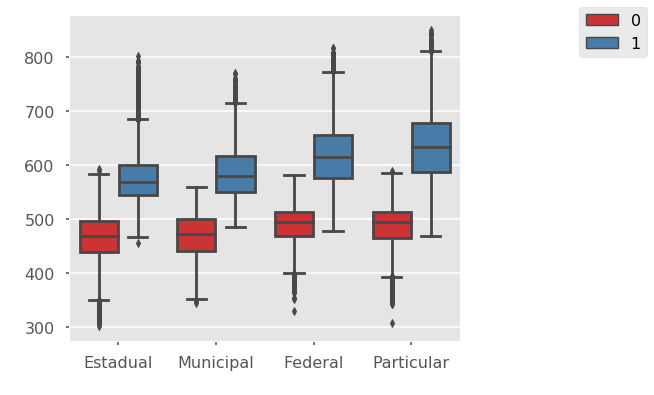

In [9]:
sns.set_palette(sns.color_palette("Set1"))
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_MEDIA",  hue="Cluster", data=df,  order=['Estadual','Municipal','Federal','Particular'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
legend = G.legend(bbox_to_anchor=(1.5, 1.05))
G.set_xticklabels(G.get_xticklabels(),rotation=0)
G.set_ylabel(" ")

Text(0, 0.5, ' ')

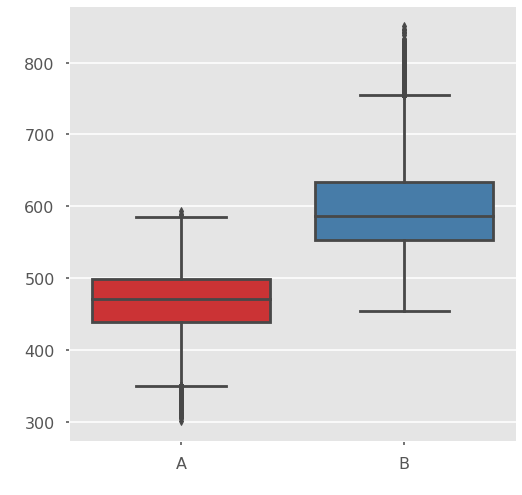

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Cluster", y="NU_MEDIA", data=df)

#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xticklabels(["A","B"])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, 'Frequência (%)')

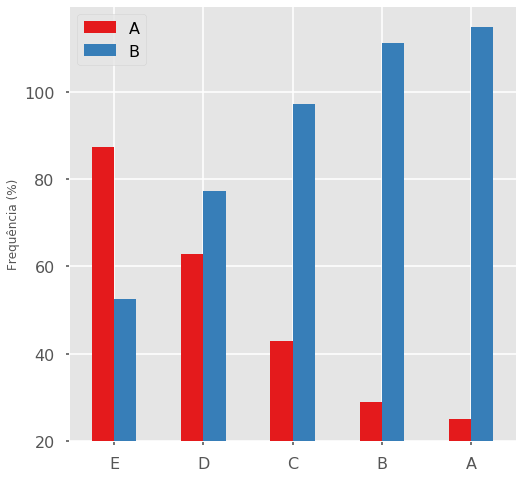

In [93]:
social = {} 
total_ClasseSocial_A = dadosEnem.query("ClasseSocial == 'A'").shape[0]
ClasseSocial_A_A = dadosEnem.query("ClasseSocial == 'A' and Cluster == 0").shape[0]/total_ClasseSocial_A
ClasseSocial_A_B = dadosEnem.query("ClasseSocial == 'A' and Cluster == 1").shape[0]/total_ClasseSocial_A
                                      
                                       
total_ClasseSocial_B = dadosEnem.query("ClasseSocial == 'B'").shape[0]
ClasseSocial_B_A = dadosEnem.query("ClasseSocial == 'B' and Cluster == 0").shape[0]/total_ClasseSocial_B
ClasseSocial_B_B = dadosEnem.query("ClasseSocial == 'B' and Cluster == 1").shape[0]/total_ClasseSocial_B
                                       
total_ClasseSocial_C = dadosEnem.query("ClasseSocial == 'C'").shape[0]
ClasseSocial_C_A = dadosEnem.query("ClasseSocial == 'C' and Cluster == 0").shape[0]/total_ClasseSocial_C
ClasseSocial_C_B = dadosEnem.query("ClasseSocial == 'C' and Cluster == 1").shape[0]/total_ClasseSocial_C

total_ClasseSocial_D = dadosEnem.query("ClasseSocial == 'D'").shape[0]
ClasseSocial_D_A = dadosEnem.query("ClasseSocial == 'D' and Cluster == 0").shape[0]/total_ClasseSocial_D
ClasseSocial_D_B = dadosEnem.query("ClasseSocial == 'D' and Cluster == 1").shape[0]/total_ClasseSocial_D


total_ClasseSocial_E = dadosEnem.query("ClasseSocial == 'E'").shape[0]
ClasseSocial_E_A = dadosEnem.query("ClasseSocial == 'E' and Cluster == 0").shape[0]/total_ClasseSocial_E
ClasseSocial_E_B = dadosEnem.query("ClasseSocial == 'E' and Cluster == 1").shape[0]/total_ClasseSocial_E


classePorCluster = [ClasseSocial_A_A,ClasseSocial_A_B,ClasseSocial_B_A,ClasseSocial_B_B,ClasseSocial_C_A,ClasseSocial_C_B,ClasseSocial_D_A,ClasseSocial_D_B,ClasseSocial_E_A,ClasseSocial_E_B]
teste = pd.DataFrame({'A':classePorCluster[:2],'B':classePorCluster[2:4],'C':classePorCluster[4:6],'D':classePorCluster[6:8],'E':classePorCluster[8:10]})
df = teste.T
df.columns = ['A','B']
df = df.iloc[::-1]


ax = df.plot(kind='bar',figsize=(8, 8))
ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_ylabel("Frequência (%)")




In [94]:
dadosEnem['RendaMaxima'].value_counts()

998      231721
1497     223484
2495      92246
1996      77677
3992      63696
2994      40095
0         38603
4990      35434
5988      30528
19960     21297
6986      15216
7984      12004
11976     11975
14970      9691
8982       8546
9980       8375
Name: RendaMaxima, dtype: int64

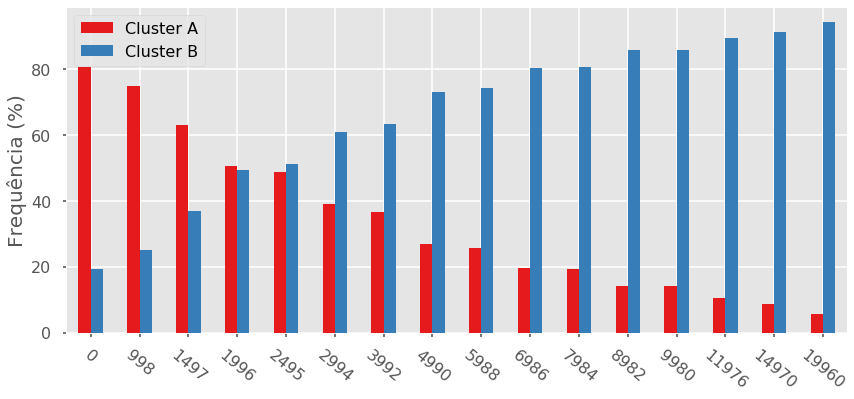

In [95]:
rendas = [] 
limites = ['0','998','1497','1996','2495','2994','3992','4990','5988','6986','7984','8982','9980','11976','14970','19960']

for var in limites:
    total_Renda = dadosEnem.query("RendaMaxima == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("RendaMaxima == " + var + "and Cluster == 0").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("RendaMaxima == " + var +  "and Cluster == 1").shape[0]/total_Renda)    



teste = pd.DataFrame({'0':rendas[:2], '998':rendas[2:4],'1497':rendas[4:6],'1996':rendas[6:8],'2495':rendas[8:10],
                      '2994':rendas[10:12],
                      '3992':rendas[12:14],'4990':rendas[14:16],'5988':rendas[16:18],'6986':rendas[18:20],'7984':rendas[20:22],
                      '8982':rendas[22:24],'9980':rendas[24:26],'11976':rendas[26:28],'14970':rendas[28:30],'19960':rendas[30:32]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(14, 6))

ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(20)
    



In [96]:
var = limites[0]
total_Renda = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'" ).shape[0]   

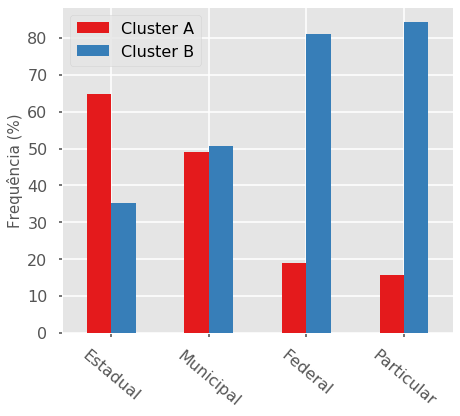

In [97]:
rendas = [] 
limites = ["'Estadual'","'Municipal'","'Federal'","'Particular'"]

for var in limites:
    total = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var + "and Cluster == 0").shape[0]/total)
    rendas.append(dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == " + var +  "and Cluster == 1").shape[0]/total)    



teste = pd.DataFrame({'Estadual':rendas[:2], 'Municipal':rendas[2:4],'Federal':rendas[4:6],'Particular':rendas[6:8]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(7,6))
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(15)    


In [98]:
sorted(dadosEnem['RendaMaxima'].value_counts(normalize=True), reverse=True)

[0.25170977679483114,
 0.24276223457181714,
 0.10020334829478551,
 0.0843775934511421,
 0.06919056081547881,
 0.04355368525333808,
 0.04193298196370146,
 0.03849061686661134,
 0.03316141422655955,
 0.02313412731862679,
 0.016528566524873233,
 0.01303949215066892,
 0.013007990545173303,
 0.010526967546828766,
 0.00928319726088109,
 0.00909744641468279]

In [99]:
dadosEnem.query("RendaMaxima < 2994 and RendaMaxima >= 998 ").shape[0]/dadosEnem.shape[0] * 100

67.90529531125759

In [100]:
dadosEnem['RendaMaxima'].value_counts(normalize=True)

998      0.251710
1497     0.242762
2495     0.100203
1996     0.084378
3992     0.069191
2994     0.043554
0        0.041933
4990     0.038491
5988     0.033161
19960    0.023134
6986     0.016529
7984     0.013039
11976    0.013008
14970    0.010527
8982     0.009283
9980     0.009097
Name: RendaMaxima, dtype: float64

In [101]:
dadosEnem['Estudo Mãe'].value_counts()

Medio                    330154
FundamentalIncompleto    240383
Superior                 184209
FundamentalCompleto      134368
NaoSabe                   31474
Name: Estudo Mãe, dtype: int64

In [102]:
dadosEnem.columns
dadosAdptados = dadosEnem
dadosAdptados['Estudo Mãe'].replace("Medio", "MedioCompleto", inplace=True)
dadosAdptados['Estudo Mãe'].replace("FundamentalIncompleto", "MedioIncompleto", inplace=True)
dadosAdptados['Estudo Mãe'].replace("FundamentalCompleto", "MedioIncompleto", inplace=True)
dadosAdptados['Estudo Mãe'].replace("Superior", "MedioCompleto", inplace=True)


In [103]:
# dadosEnem.groupby('Cluster')['NU_MEDIA'].describe()
# df.apply(pd.Series.value_counts)

dadosAdptados[['TP_SEXO','COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LINGUA','Estudo Mãe']].apply(pd.Series.value_counts, normalize=True)

,TP_SEXO,COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LINGUA,Estudo Mãe
Branco,NaN,0.389056,NaN,NaN,NaN
Espanhol,NaN,NaN,NaN,0.462083,NaN
Estadual,NaN,NaN,0.772884,NaN,NaN
F,0.58101,NaN,NaN,NaN,NaN
Federal,NaN,NaN,0.050356,NaN,NaN
Inglês,NaN,NaN,NaN,0.537917,NaN
M,0.41899,NaN,NaN,NaN,NaN
MedioCompleto,NaN,NaN,NaN,NaN,0.558733
MedioIncompleto,NaN,NaN,NaN,NaN,0.407078
Municipal,NaN,NaN,0.008295,NaN,NaN


In [104]:
clusterA = dadosAdptados.query("Cluster == 0")
clusterA[['TP_SEXO','COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LINGUA','Estudo Mãe']].apply(pd.Series.value_counts, normalize=True)

,TP_SEXO,COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LINGUA,Estudo Mãe
Branco,NaN,0.292420,NaN,NaN,NaN
Espanhol,NaN,NaN,NaN,0.57714,NaN
Estadual,NaN,NaN,0.925574,NaN,NaN
F,0.620057,NaN,NaN,NaN,NaN
Federal,NaN,NaN,0.017608,NaN,NaN
Inglês,NaN,NaN,NaN,0.42286,NaN
M,0.379943,NaN,NaN,NaN,NaN
MedioCompleto,NaN,NaN,NaN,NaN,0.437324
MedioIncompleto,NaN,NaN,NaN,NaN,0.515430
Municipal,NaN,NaN,0.007555,NaN,NaN


In [105]:
# clusterA.apply(pd.Series.value_counts,normalize=True).round(2).T.plot(kind='bar',stacked=True, color=sns.color_palette("Set2"))

In [106]:
clusterA = dadosAdptados.query("Cluster == 0")
clusterA = clusterA[['TP_SEXO','COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LINGUA','Estudo Mãe','Tem Computador','ClasseSocial']]
clusterA = pd.get_dummies(clusterA)
# clusterB[['TP_SEXO','COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LINGUA','Estudo Mãe']].apply(pd.Series.value_counts)
clusterA.apply(pd.Series.value_counts,normalize=True).round(2).transpose()[1]

TP_SEXO_F                            0.62
TP_SEXO_M                            0.38
COR_RACA_Branco                      0.29
COR_RACA_NaoBranco                   0.69
COR_RACA_NaoDeclarado                0.02
TP_DEPENDENCIA_ADM_ESC_Estadual      0.93
TP_DEPENDENCIA_ADM_ESC_Federal       0.02
TP_DEPENDENCIA_ADM_ESC_Municipal     0.01
TP_DEPENDENCIA_ADM_ESC_Particular    0.05
TP_LINGUA_Espanhol                   0.58
TP_LINGUA_Inglês                     0.42
Estudo Mãe_MedioCompleto             0.44
Estudo Mãe_MedioIncompleto           0.52
Estudo Mãe_NaoSabe                   0.05
Tem Computador_Não                   0.62
Tem Computador_Sim                   0.38
ClasseSocial_A                       0.00
ClasseSocial_B                       0.01
ClasseSocial_C                       0.05
ClasseSocial_D                       0.17
ClasseSocial_E                       0.77
Name: 1, dtype: float64

In [107]:
clusterB = dadosAdptados.query("Cluster == 1")
clusterB = clusterB[['TP_SEXO','COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LINGUA','Estudo Mãe','Tem Computador','ClasseSocial']]
clusterB = pd.get_dummies(clusterB)
# clusterB[['TP_SEXO','COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LINGUA','Estudo Mãe']].apply(pd.Series.value_counts)
clusterB.apply(pd.Series.value_counts,normalize=True).round(2).transpose()[1]

TP_SEXO_F                            0.54
TP_SEXO_M                            0.46
COR_RACA_Branco                      0.50
COR_RACA_NaoBranco                   0.48
COR_RACA_NaoDeclarado                0.02
TP_DEPENDENCIA_ADM_ESC_Estadual      0.59
TP_DEPENDENCIA_ADM_ESC_Federal       0.09
TP_DEPENDENCIA_ADM_ESC_Municipal     0.01
TP_DEPENDENCIA_ADM_ESC_Particular    0.31
TP_LINGUA_Espanhol                   0.33
TP_LINGUA_Inglês                     0.67
Estudo Mãe_MedioCompleto             0.70
Estudo Mãe_MedioIncompleto           0.28
Estudo Mãe_NaoSabe                   0.02
Tem Computador_Não                   0.29
Tem Computador_Sim                   0.71
ClasseSocial_A                       0.03
ClasseSocial_B                       0.07
ClasseSocial_C                       0.20
ClasseSocial_D                       0.27
ClasseSocial_E                       0.44
Name: 1, dtype: float64

In [108]:
dadosEnem.TP_LINGUA.value_counts(normalize=True)

Inglês      0.537917
Espanhol    0.462083
Name: TP_LINGUA, dtype: float64

In [109]:
dadosEnem.groupby("TP_LINGUA").get_group("Espanhol").RendaMaxima.std()


# [['RendaMaxima']].RendaMaxima.

2187.206509084067

In [110]:
dadosEnem.groupby("TP_LINGUA").get_group("Inglês").RendaMaxima.std() 


4348.844359518743

In [111]:
dadosEnem.groupby("TP_LINGUA").describe()['RendaMaxima']

,count,mean,std,min,25%,50%,75%,max
TP_LINGUA,,,,,,,,
Espanhol,425388.0,2064.395662,2187.206509,0.0,998.0,1497.0,2495.0,19960.0
Inglês,495200.0,3802.168389,4348.844360,0.0,1497.0,1996.0,3992.0,19960.0


In [112]:
amostras = dadosEnem

In [113]:
amostras = amostras[['ClasseSocial','COR_RACA','Cluster','TP_DEPENDENCIA_ADM_ESC','TP_SEXO','Tem Computador','TP_LINGUA']]

In [114]:
clusters = amostras.groupby("Cluster")

In [115]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(amostras)))

In [116]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

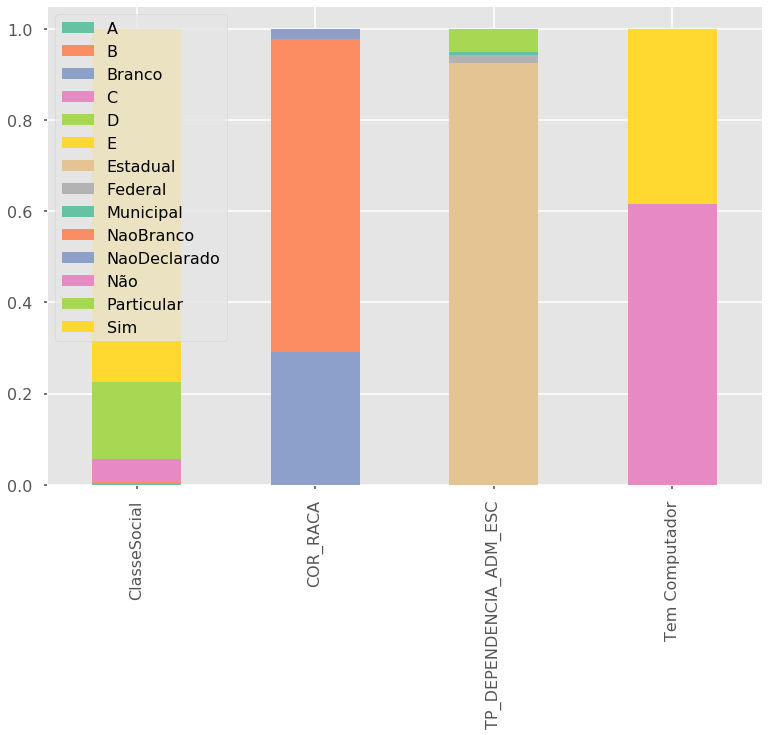

In [117]:
clusters.get_group(0)[['ClasseSocial','COR_RACA','TP_DEPENDENCIA_ADM_ESC','Tem Computador']].apply(pd.Series.value_counts,normalize=True).T.plot(kind='bar',stacked=True, color=sns.color_palette("Set2"))

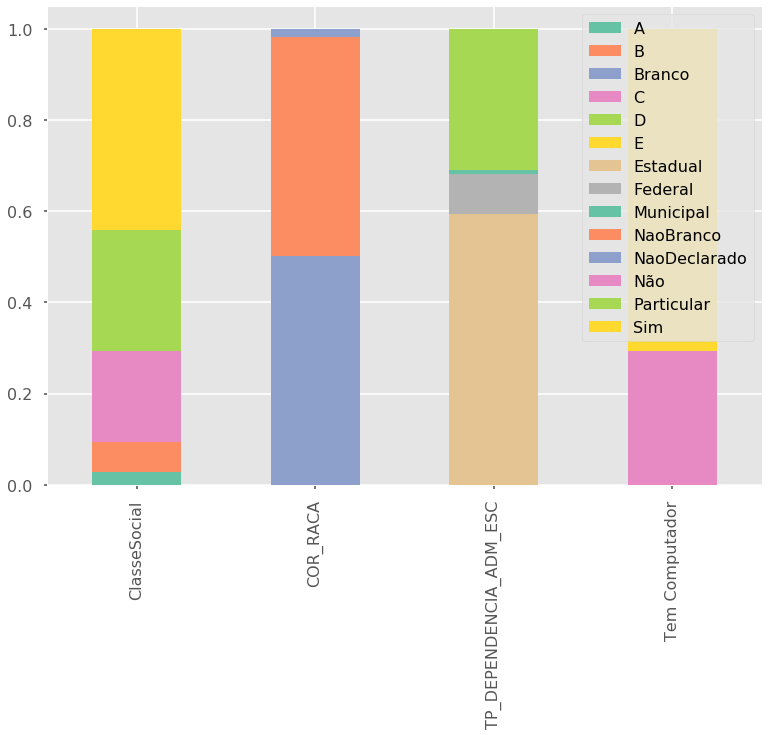

In [118]:
clusters.get_group(1)[['ClasseSocial','COR_RACA','TP_DEPENDENCIA_ADM_ESC','Tem Computador']].apply(pd.Series.value_counts,normalize=True).T.plot(kind='bar',stacked=True, color=sns.color_palette("Set2"))

In [119]:
clusters.get_group(0)[['ClasseSocial','COR_RACA','TP_DEPENDENCIA_ADM_ESC','Tem Computador']].apply(pd.Series.value_counts,normalize=True)

,ClasseSocial,COR_RACA,TP_DEPENDENCIA_ADM_ESC,Tem Computador
A,0.001291,NaN,NaN,NaN
B,0.005411,NaN,NaN,NaN
Branco,NaN,0.292420,NaN,NaN
C,0.050574,NaN,NaN,NaN
D,0.168607,NaN,NaN,NaN
E,0.774117,NaN,NaN,NaN
Estadual,NaN,NaN,0.925574,NaN
Federal,NaN,NaN,0.017608,NaN
Municipal,NaN,NaN,0.007555,NaN
NaoBranco,NaN,0.685647,NaN,NaN


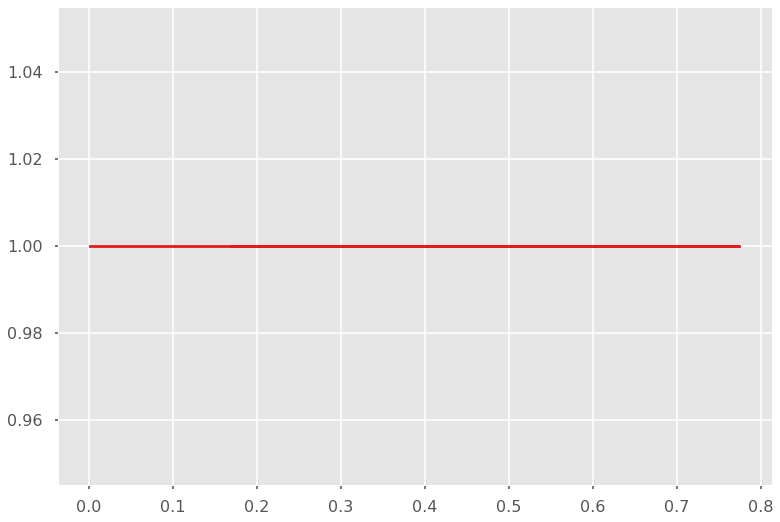

In [120]:
clusters.get_group(0)['ClasseSocial'].value_counts(normalize=True).value_counts().plot()

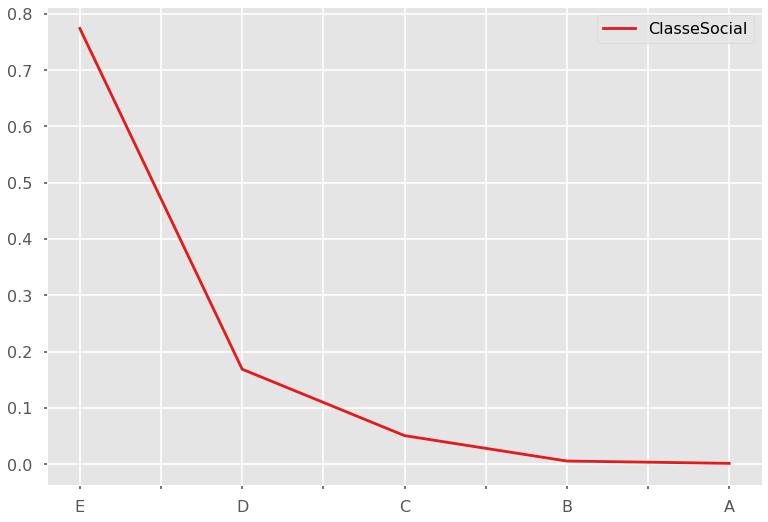

In [121]:
clusters.get_group(0)['ClasseSocial'].value_counts(normalize=True).to_frame().plot()

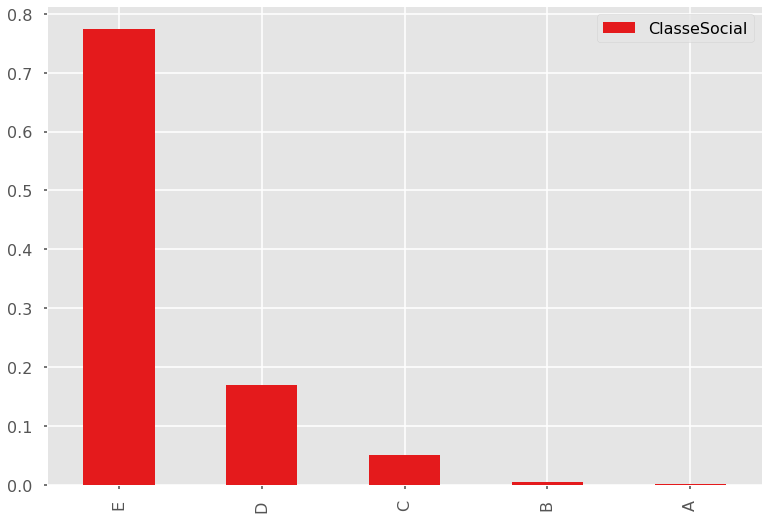

In [122]:
clusters.get_group(0)['ClasseSocial'].value_counts(normalize=True).to_frame().plot(kind='bar')

In [123]:
clusters.get_group(0)['ClasseSocial'].value_counts(normalize=True)

E    0.774117
D    0.168607
C    0.050574
B    0.005411
A    0.001291
Name: ClasseSocial, dtype: float64

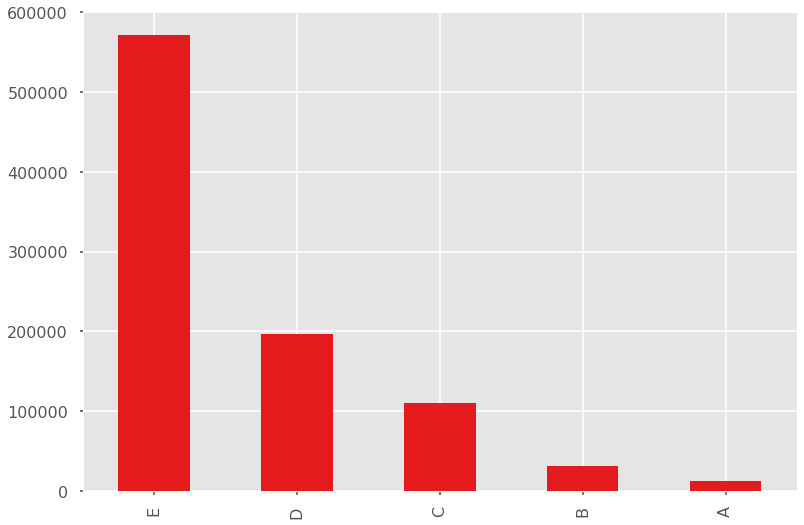

In [124]:
amostras['ClasseSocial'].value_counts().plot(kind='bar')

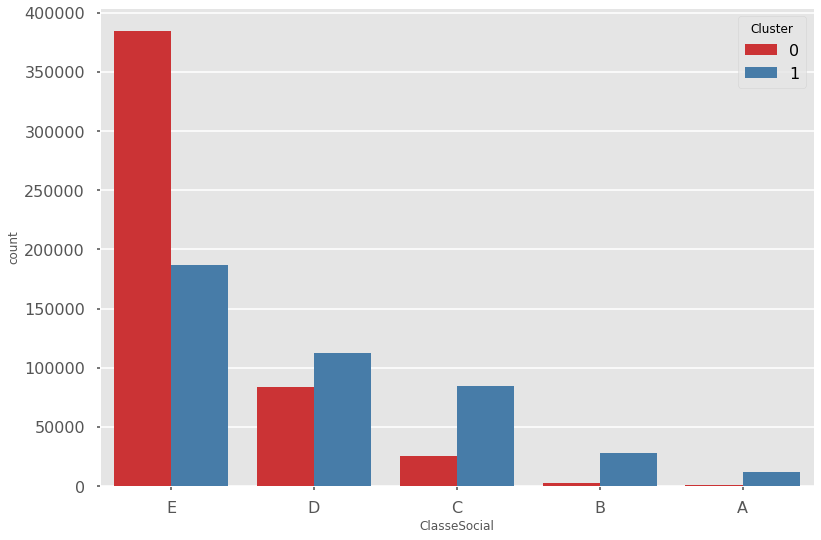

In [125]:
sns.countplot(data=amostras,x='ClasseSocial',hue='Cluster')

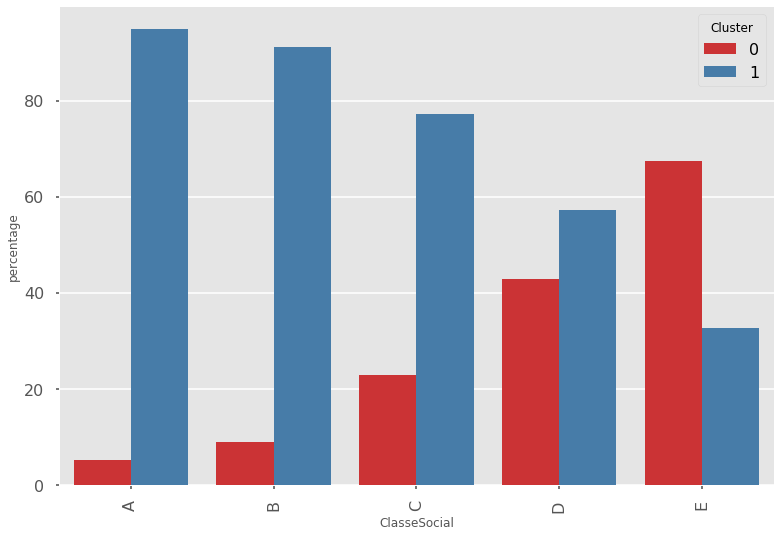

In [126]:
occupation_counts = (amostras.groupby(['ClasseSocial'])['Cluster']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('ClasseSocial'))
p = sns.barplot(x="ClasseSocial", y="percentage", hue="Cluster", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

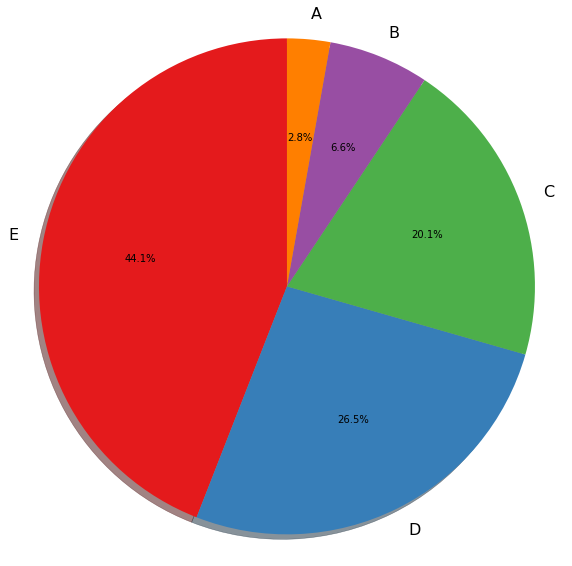

In [127]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
values = clusters.get_group(1).ClasseSocial.value_counts()
labels = clusters.get_group(1).ClasseSocial.value_counts().index.tolist()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


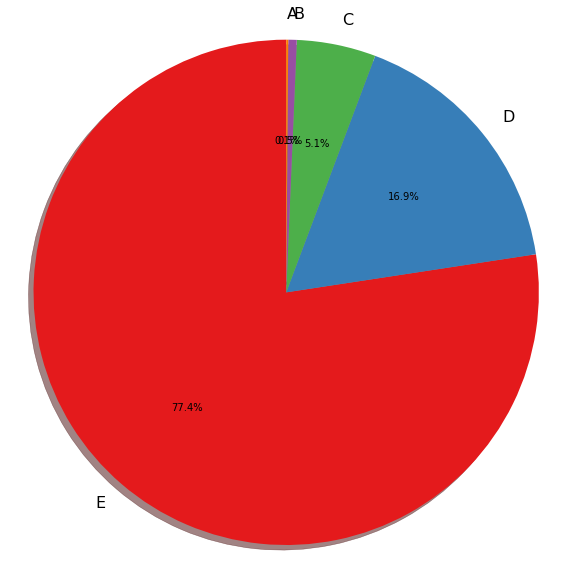

In [128]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
values = clusters.get_group(0).ClasseSocial.value_counts()
labels = clusters.get_group(0).ClasseSocial.value_counts().index.tolist()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [129]:
clusterA = clusters.get_group(0)
clusterB = clusters.get_group(1)

C:\Users\vinic\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


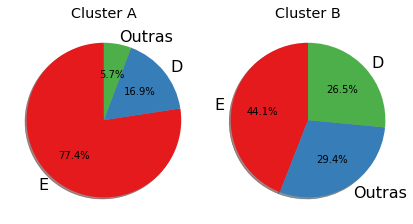

In [130]:
clusterA.ClasseSocial.replace("C", "Outras", inplace=True) 
clusterA.ClasseSocial.replace("B", "Outras", inplace=True) 
clusterA.ClasseSocial.replace("A", "Outras", inplace=True) 

clusterB.ClasseSocial.replace("C", "Outras", inplace=True) 
clusterB.ClasseSocial.replace("B", "Outras", inplace=True) 
clusterB.ClasseSocial.replace("A", "Outras", inplace=True) 

valuesA = clusterA.ClasseSocial.value_counts()
labelsA = clusterA.ClasseSocial.value_counts().index.tolist()

valuesB = clusterB.ClasseSocial.value_counts()
labelsB = clusterB.ClasseSocial.value_counts().index.tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
axes[0].pie(valuesA, labels=labelsA, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title("Cluster A")
axes[1].pie(valuesB, labels=labelsB, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].set_title("Cluster B")
fig.tight_layout()

In [131]:
clusters.get_group(0)

,ClasseSocial,COR_RACA,Cluster,TP_DEPENDENCIA_ADM_ESC,TP_SEXO,Tem Computador,TP_LINGUA
1,E,NaoBranco,0,Estadual,F,Não,Inglês
2,E,NaoBranco,0,Estadual,F,Não,Espanhol
3,E,NaoBranco,0,Estadual,F,Não,Inglês
4,E,NaoBranco,0,Estadual,F,Não,Espanhol
7,E,NaoBranco,0,Estadual,M,Não,Inglês
...,...,...,...,...,...,...,...
920575,E,NaoBranco,0,Estadual,F,Não,Espanhol
920577,E,Branco,0,Estadual,F,Não,Espanhol
920578,E,NaoBranco,0,Estadual,M,Sim,Espanhol
920579,E,Branco,0,Estadual,F,Sim,Inglês


In [132]:
color=sns.color_palette("Set2")
color[0:2]

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

In [133]:
cores = [color[0], color[1]]
cores = [cores[-1], cores[0]]
cores

[(0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

C:\Users\vinic\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


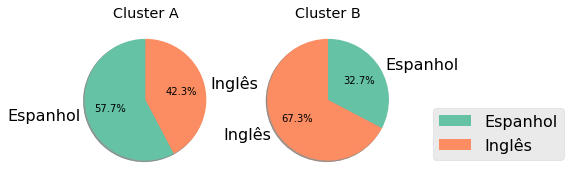

In [134]:
var = 'TP_LINGUA'

# clusterA.replace("Municipal", "Outras", inplace=True) 
# clusterA[var].replace("Federal", "Outras", inplace=True) 
# # clusterA[var].replace("A", "Outras", inplace=True) 

# clusterB[var].replace("C", "Outras", inplace=True) 
# clusterB[var].replace("B", "Outras", inplace=True) 
# clusterB[var].replace("A", "Outras", inplace=True) 

valuesA = clusterA[var].value_counts()
labelsA = clusterA[var].value_counts().index.tolist()

valuesB = clusterB[var].value_counts()
labelsB = clusterB[var].value_counts().index.tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
axes[0].pie(valuesA, labels=labelsA, autopct='%1.1f%%',shadow=True, startangle=90,colors=color[0:2])
axes[0].set_title("Cluster A")
axes[0].legend(bbox_to_anchor=(3.3,0.5))
axes[1].pie(valuesB, labels=labelsB, autopct='%1.1f%%',shadow=True, startangle=90,colors=cores)
axes[1].set_title("Cluster B")
fig.tight_layout()

C:\Users\vinic\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\vinic\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


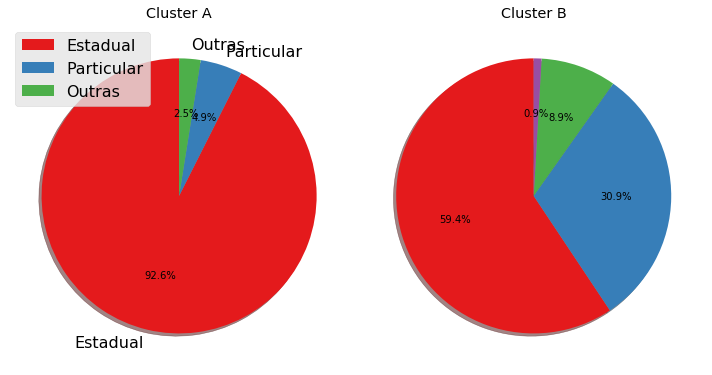

In [135]:
var = 'TP_DEPENDENCIA_ADM_ESC'

clusterA.replace("Municipal", "Outras", inplace=True) 
clusterA[var].replace("Federal", "Outras", inplace=True) 
# clusterA[var].replace("A", "Outras", inplace=True) 

clusterB[var].replace("C", "Outras", inplace=True) 
clusterB[var].replace("B", "Outras", inplace=True) 
clusterB[var].replace("A", "Outras", inplace=True) 

valuesA = clusterA[var].value_counts()
labelsA = clusterA[var].value_counts().index.tolist()

valuesB = clusterB[var].value_counts()
labelsB = clusterB[var].value_counts().index.tolist()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].pie(valuesA, labels=labelsA, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title("Cluster A")
axes[0].legend()
axes[1].pie(valuesB, labels=['','','',''], autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].set_title("Cluster B")
fig.tight_layout()

In [136]:
# var = 'TP_DEPENDENCIA_ADM_ESC'

# clusterA.replace("Municipal", "Outras", inplace=True) 
# clusterA[var].replace("Federal", "Outras", inplace=True) 
# # clusterA[var].replace("A", "Outras", inplace=True) 

# clusterB[var].replace("C", "Outras", inplace=True) 
# clusterB[var].replace("B", "Outras", inplace=True) 
# clusterB[var].replace("A", "Outras", inplace=True) 

# valuesA = clusterA[var].value_counts()
# labelsA = clusterA[var].value_counts().index.tolist()

# valuesB = clusterB[var].value_counts()
# labelsB = clusterB[var].value_counts().index.tolist()

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
# axes[0].bar(valuesA, labels=labelsA, autopct='%1.1f%%',shadow=True, startangle=90)
# axes[0].set_title("Cluster A")
# axes[0].legend()
# axes[1].bar(valuesB, labels=bales, autopct='%1.1f%%',shadow=True, startangle=90)
# axes[1].set_title("Cluster B")
# fig.tight_layout()

In [137]:
clusters.get_group(0)

,ClasseSocial,COR_RACA,Cluster,TP_DEPENDENCIA_ADM_ESC,TP_SEXO,Tem Computador,TP_LINGUA
1,E,NaoBranco,0,Estadual,F,Não,Inglês
2,E,NaoBranco,0,Estadual,F,Não,Espanhol
3,E,NaoBranco,0,Estadual,F,Não,Inglês
4,E,NaoBranco,0,Estadual,F,Não,Espanhol
7,E,NaoBranco,0,Estadual,M,Não,Inglês
...,...,...,...,...,...,...,...
920575,E,NaoBranco,0,Estadual,F,Não,Espanhol
920577,E,Branco,0,Estadual,F,Não,Espanhol
920578,E,NaoBranco,0,Estadual,M,Sim,Espanhol
920579,E,Branco,0,Estadual,F,Sim,Inglês


In [138]:
for var in limites:
    limites = ["'NaoBranco'","'Branco'","'NaoDeclarado'"]
    total = dadosEnem.query("COR_RACA == " + var).shape[0]    
    print(total)
    

0
0
0
0


Text(0, 0.5, 'Frequência (%)')

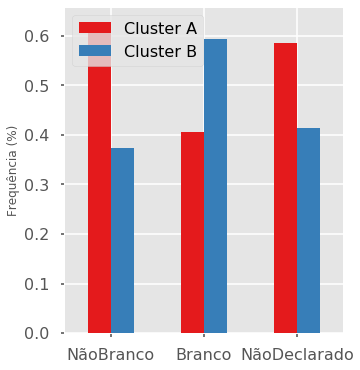

In [139]:
rendas = [] 
limites = ["'NaoBranco'","'Branco'","'NaoDeclarado'"]

for var in limites:
    total = dadosEnem.query("COR_RACA == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("COR_RACA == " + var + "and Cluster == 0").shape[0]/total)
    rendas.append(dadosEnem.query("COR_RACA == " + var +  "and Cluster == 1").shape[0]/total)    



teste = pd.DataFrame({'NãoBranco':rendas[:2], 'Branco':rendas[2:4],'NãoDeclarado':rendas[4:6]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(5, 6))
#ax.set_yticklabels(['20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_ylabel("Frequência (%)")
    


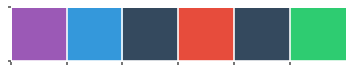

In [58]:
flatui = ["#9b59b6", "#3498db", "#34495e", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(sns.color_palette(flatui))


In [59]:
sns.choose_colorbrewer_palette("qualitative")
#qualitative
#sequential

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [60]:
my_pal = [(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]



In [61]:
dadosEnem['Cluster'].replace(to_replace =[0], value ='A',inplace=True) 
dadosEnem['Cluster'].replace(to_replace =[1], value ='B',inplace=True) 
dadosEnem

,TP_SEXO,TP_COR_RACA,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,...,RendaMaxima,ClasseSocial,anosEstudoPai,anosEstudoMae,COR_RACA,RazaoPessoasQuarto,PessoasPorQuarto,NU_MEDIA,MEDIA_FAIXA,Cluster
0,F,Branco,15230023.0,Paragominas,PA,Particular,Urbano,574.2,538.7,582.6,...,1497,E,0,12,Branco,0.75,"(0, 1]",581.40,"(576.04, 713.43]",B
1,F,Parda,15042626.0,Belém,PA,Estadual,Urbano,369.7,398.2,395.6,...,998,E,4,4,NaoBranco,4.00,"(3, 4]",423.46,"(0.0, 438.65]",A
2,F,Parda,15045560.0,Castanhal,PA,Estadual,Urbano,376.4,354.7,525.8,...,1497,E,4,9,NaoBranco,1.50,"(1, 2]",461.26,"(438.65, 576.04]",A
3,F,Parda,15038378.0,Belém,PA,Estadual,Urbano,423.0,372.8,488.7,...,1497,E,12,12,NaoBranco,3.00,"(2, 3]",468.20,"(438.65, 576.04]",A
4,F,Parda,15582949.0,Paragominas,PA,Estadual,Urbano,412.5,417.2,485.1,...,1497,E,12,12,NaoBranco,1.50,"(1, 2]",468.20,"(438.65, 576.04]",A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920583,F,Branco,31103527.0,João Monlevade,MG,Estadual,Urbano,533.3,485.8,530.2,...,998,E,9,12,Branco,2.50,"(2, 3]",536.96,"(438.65, 576.04]",B
920584,F,Branco,31174688.0,Três Pontas,MG,Estadual,Urbano,486.2,543.4,560.3,...,7984,C,16,16,Branco,1.50,"(1, 2]",573.02,"(438.65, 576.04]",B
920585,F,Preta,31253227.0,Ouro Preto,MG,Federal,Urbano,500.8,563.2,555.3,...,4990,C,16,18,NaoBranco,1.67,"(1, 2]",568.42,"(438.65, 576.04]",B
920586,F,Parda,31009107.0,Uberlândia,MG,Federal,Urbano,491.6,549.3,586.8,...,7984,C,12,18,NaoBranco,1.33,"(1, 2]",580.24,"(576.04, 713.43]",B


In [62]:
dadosEnem['TP_LINGUA'].value_counts()

Inglês      495200
Espanhol    425388
Name: TP_LINGUA, dtype: int64

from pandas.plotting import parallel_coordinates

sample = dadosEnem.query("Nome_Mesorregiao == 'Zona da Mata'")

parallel_coordinates(sample[['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','Cluster']], 'Cluster',color=[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),(0.21568627450980393, 0.4941176470588236, 0.7215686274509804)])

In [63]:
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

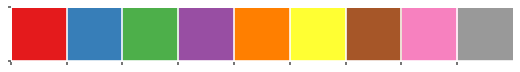

In [65]:
sns.palplot(sns.color_palette("Set1"))


-----
-----
-----
-----
-----
-----


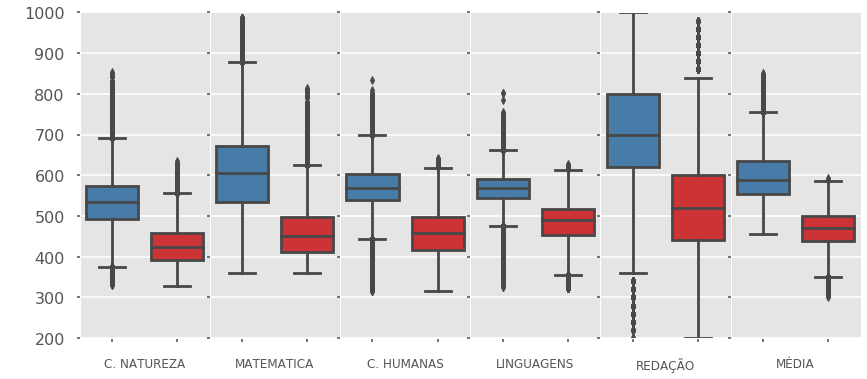

In [66]:
sns.set_palette(sns.color_palette("Set1"))
colors=[(0.21568627450980393, 0.4941176470588236, 0.7215686274509804),(0.8941176470588235, 0.10196078431372557, 0.10980392156862737)]


area = plt.figure(figsize=(14, 6))
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
notas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_MEDIA']
nomes = ['C. NATUREZA','MATEMATICA','C. HUMANAS','LINGUAGENS','REDAÇÃO','MÉDIA']
for i in range(len(notas)):
    g = area.add_subplot(1, 6, i+1)
    g = sns.boxplot(x="Cluster", y=notas[i], data=dadosEnem,palette=colors)
    #print(notas[i])
#     A = dadosEnem.query("Cluster == 'A'")[notas[i]].median()
#     B = dadosEnem.query("Cluster == 'B'")[notas[i]].median()
#     print("Notas Custer A", A)
#     print("Notas Custer B", B )
#     print("Diferença: ", B - A)
    print("-----")
    g.set_ylabel(" ")
    g.set_xlabel(nomes[i])
    g.set_ylim(200,1001)
    g.set_xticklabels("")
    if(i!=0):
        g.set_yticklabels("")
       



plt.subplots_adjust(wspace = 0)


#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
#G.set_xlabel(" ")
#G.set_ylabel(" ")

In [67]:
#randaMaxByCluster = dadosEnem.Cluster.value_counts()
#ax = sns.barplot(x="RendaMaxima", y="mediaNota", hue="Cluster",data=dadosEnem, estimator=lambda x: sum(x==0)*100.0/len(x))

In [68]:
dadosEnem.columns

Index(['TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'CO_UF_ESC', 'Estudo Pai', 'Estudo Mãe',
       'Trabalho Pai', 'Trabalho Mãe', 'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima', 'ClasseSocial', 'anosEstudoPai',
       'anosEstudoMae', 'COR_RACA', 'RazaoPessoasQuarto', 'PessoasPorQuarto',
       'NU_MEDIA', 'MEDIA_FAIXA', 'Cluster'],
      dtype='object')

Text(0, 0.5, ' ')

<Figure size 921.6x633.6 with 0 Axes>

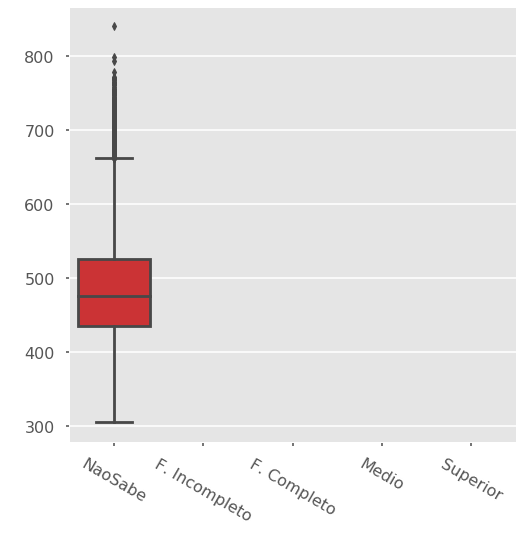

In [69]:
# sns.set_palette(sns.color_palette("Oranges"))
area = plt.figure()


area.tight_layout(pad=10)


fig, ax = plt.subplots(figsize=(8, 8))
G = sns.boxplot(x="Estudo Mãe", y="NU_MEDIA", data=dadosEnem, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

<Figure size 921.6x633.6 with 0 Axes>

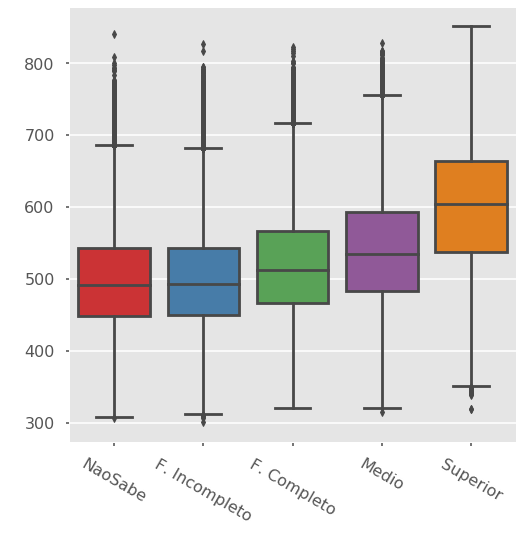

In [70]:
# sns.set_palette(sns.color_palette("Oranges"))
area = plt.figure()


area.tight_layout(pad=10)


fig, ax = plt.subplots(figsize=(8, 8))
G = sns.boxplot(x="Estudo Pai", y="NU_MEDIA", data=dadosEnem, order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-30)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, ' ')

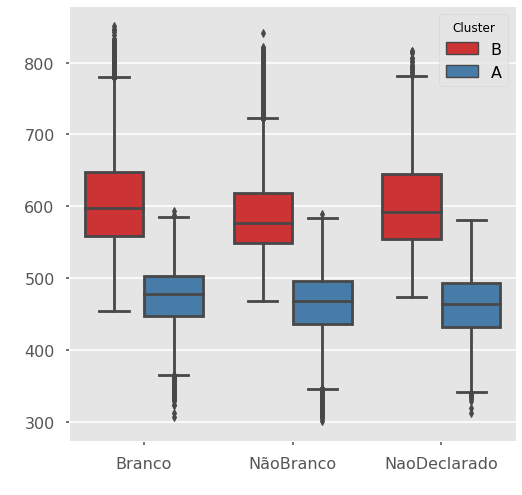

In [71]:
dadosEnem['TP_COR_RACA'].replace(to_replace =['Preta','Parda','Amarelo','Indigena'], value ='NãoBranco',inplace=True) 
dadosEnem['TP_COR_RACA'].replace(to_replace =[1], value ='B',inplace=True) 
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_COR_RACA", y="NU_MEDIA", hue="Cluster",data=df)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

Text(0, 0.5, ' ')

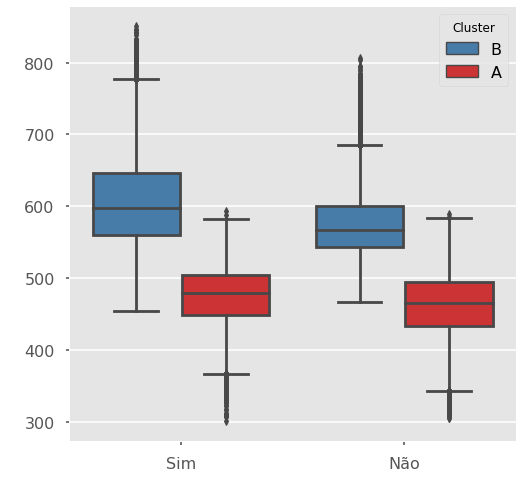

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Tem Computador", y="NU_MEDIA", hue="Cluster", data=df,palette=colors)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, ' ')

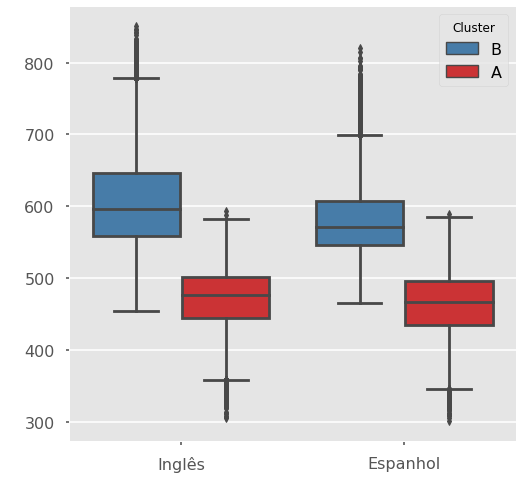

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_LINGUA", y="NU_MEDIA", hue="Cluster", data=df,palette=colors)
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")



Text(0, 0.5, 'Nota Média')

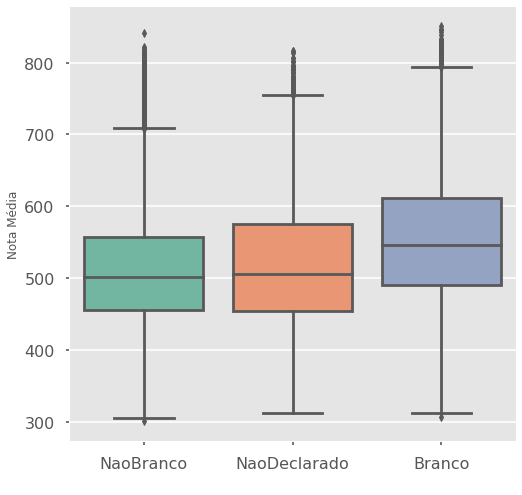

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="COR_RACA", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"),order=['NaoBranco','NaoDeclarado','Branco'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel("Nota Média")

Text(0, 0.5, ' ')

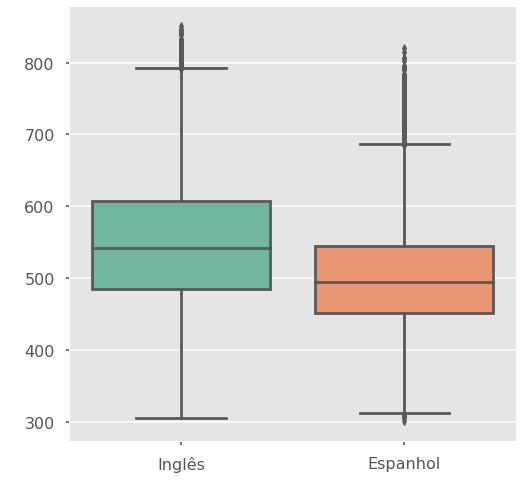

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_LINGUA", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


In [76]:
dadosEnem.columns

Index(['TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'CO_UF_ESC', 'Estudo Pai', 'Estudo Mãe',
       'Trabalho Pai', 'Trabalho Mãe', 'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima', 'ClasseSocial', 'anosEstudoPai',
       'anosEstudoMae', 'COR_RACA', 'RazaoPessoasQuarto', 'PessoasPorQuarto',
       'NU_MEDIA', 'MEDIA_FAIXA', 'Cluster'],
      dtype='object')

Text(0, 0.5, ' ')

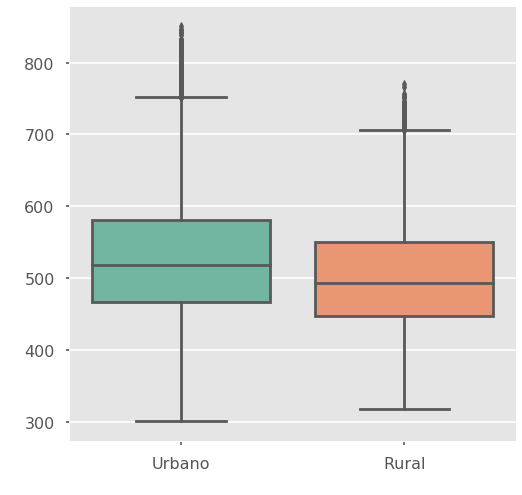

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_LOCALIZACAO_ESC", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


Text(0, 0.5, ' ')

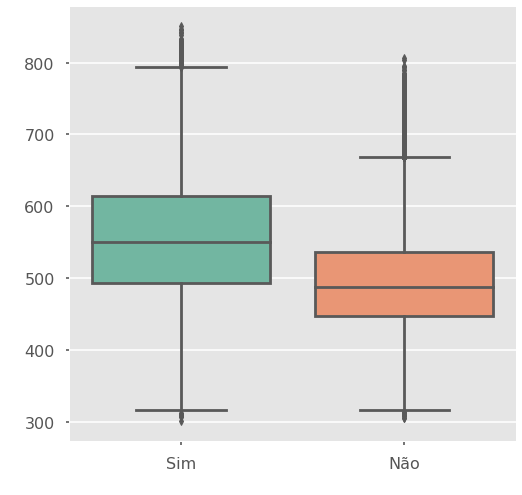

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="Tem Computador", y="NU_MEDIA", data=df,palette=sns.color_palette("Set2"))
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")


In [1]:
sns.color_palette("Set1")

NameError: name 'sns' is not defined

Text(0, 0.5, ' ')

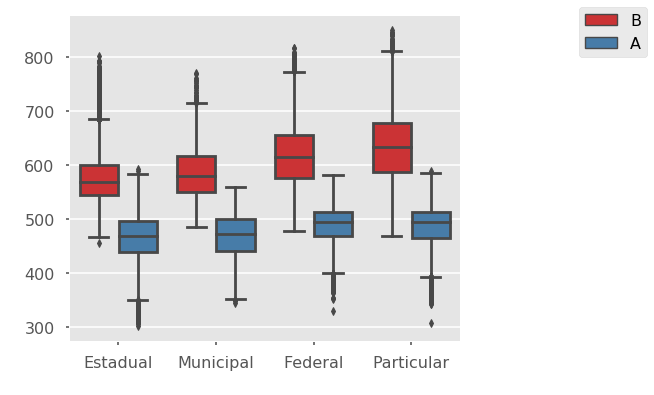

In [79]:
sns.set_palette(sns.color_palette("Set1"))
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_MEDIA",  hue="Cluster", data=df,  order=['Estadual','Municipal','Federal','Particular'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
legend = G.legend(bbox_to_anchor=(1.5, 1.05))
G.set_xticklabels(G.get_xticklabels(),rotation=0)
G.set_ylabel(" ")


Text(0, 0.5, ' ')

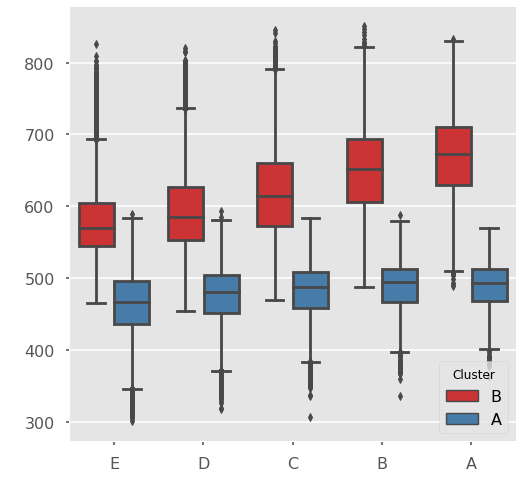

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="ClasseSocial", y="NU_MEDIA", data=df,  hue="Cluster", order=['E','D','C','B','A'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

Text(0, 0.5, ' ')

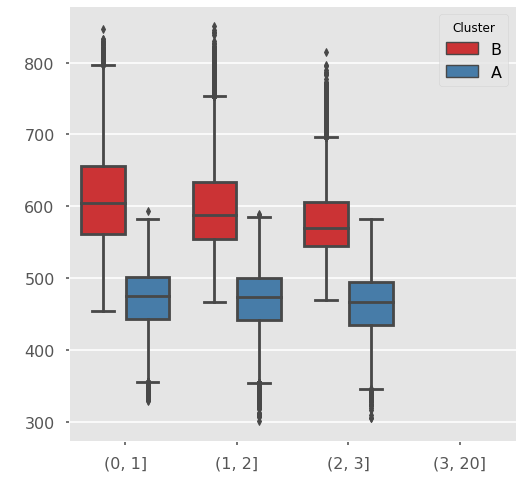

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="PessoasPorQuarto", y="NU_MEDIA", hue="Cluster", data=df, order=['(0, 1]','(1, 2]','(2, 3]','(3, 20]'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

In [82]:
# fig, ax = plt.subplots(figsize=(7, 6))
# df = dadosEnem
# G = sns.boxplot(x="Estudo Mãe", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
# G.set_xticklabels(G.get_xticklabels(),rotation=-15)
# G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
# G.set_xlabel(" ")
# G.set_ylabel(" ")
# legend = G.legend(bbox_to_anchor=(1.1, 1.05))


ValueError: Could not interpret input 'Q002'

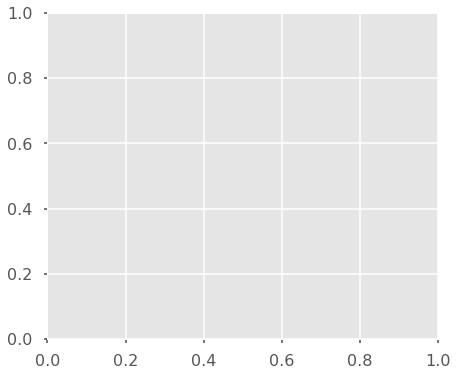

In [83]:
fig, ax = plt.subplots(figsize=(7, 6))
df = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Particular'")
G = sns.boxplot(x="Q002", y="mediaNota", data=df, hue="Cluster", order=['NaoSabe','FundamentalIncompleto','FundamentalCompleto','Medio','Superior'])
G.set_xticklabels(G.get_xticklabels(),rotation=-10)
G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")
G.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'")
G = sns.boxplot(x="ClasseSocial", y="mediaNota", data=df, hue="Cluster",order=['E','D','C','B','A'])
G.set_xlabel(" ")
G.set_ylabel(" ")

In [ ]:
Estadual = dadosEnem.query("TP_DEPENDENCIA_ADM_ESC == 'Estadual'")
total = Estadual.shape[0]

In [ ]:
info = {} 
info['naoSabe'] =  {}
info['naoSabe']['A'] =  Estadual.query("Q002 == 'NaoSabe' and Cluster == 0").shape[0]/total
info['naoSabe']['B'] =  Estadual.query("Q002 == 'NaoSabe' and Cluster == 1").shape[0]/total



info['incompleto'] = {}
info['incompleto']['A'] =  Estadual.query("Q002 == 'FundamentalIncompleto' and Cluster == 0").shape[0]/total
info['incompleto']['B'] =  Estadual.query("Q002 == 'FundamentalIncompleto' and Cluster == 1").shape[0]/total
info['completo'] = {}
info['completo']['A'] =  Estadual.query("Q002 == 'FundamentalCompleto' and Cluster == 0").shape[0]/total
info['completo']['B'] =  Estadual.query("Q002 == 'FundamentalCompleto' and Cluster == 1").shape[0]/total
info['medio'] = {}
info['medio']['A'] =  Estadual.query("Q002 == 'Medio' and Cluster == 0").shape[0]/total
info['medio']['B'] =  Estadual.query("Q002 == 'Medio' and Cluster == 1 ").shape[0]/total
info['superior'] = {}     
info['superior']['A'] =  Estadual.query("Q002 == 'Superior' and Cluster == 0").shape[0]/total
info['superior']['B'] =  Estadual.query("Q002 == 'Superior' and Cluster == 1").shape[0]/total




In [ ]:
dados = pd.DataFrame(info)
ax = dados.plot(kind='bar')
ax.set_xlabel("Escola Estadual")
ax.set_xticklabels(ax.get_xticklabels(),rotation="0")
ax.set_ylabel("Porcentagem do TOTAL de alunos de escola estadual")

In [ ]:
current_palette = sns.color_palette()
current_palette[:2]
#sns.palplot(current_palette)